In [29]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU

In [30]:
import math
from IPython.display import Image
from IPython.core.display import HTML
import requests
import re
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, SimpleRNN, LSTM, Dense

# Information Theory

Entropy

![Entropy](https://wikimedia.org/api/rest_v1/media/math/render/svg/ff26f81edc1f4bb204793a52b2430c77f6633203)

[1948 - A Mathematical Theory of Communication](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf)

[1900s - 20 Questions](https://en.wikipedia.org/wiki/Twenty_questions)

[2007 - Akinator](https://en.akinator.com/)

[2011 - IBM Watson](https://en.wikipedia.org/wiki/IBM_Watson)
symbolic + statistical AI hybrid

# Reinforcement Learning
[1989 PhD Thesis - Learning from Delayed Rewards - Q Learning](https://www.cs.rhul.ac.uk/~chrisw/new_thesis.pdf)

![QLearning](https://wikimedia.org/api/rest_v1/media/math/render/svg/a3a4d2ac903b1be02cc81e60de2e9f91d7025fec)
[2015 - Human-level control through deep reinforcement learning - Deep Q-Learning](https://www.nature.com/articles/nature14236)

[2017 - Deep Reinforcement Learning from Human Preferences](https://proceedings.neurips.cc/paper_files/paper/2017/file/d5e2c0adad503c91f91df240d0cd4e49-Paper.pdf)

# Natural Language Processing
[N-Grams]()

[RNN - LSTM - GRU]()

[Google NGrams]()



# Historical Chatbots 
- [ELIZA (1966): Pattern-matching, therapist parody.](https://psych.fullerton.edu/mbirnbaum/psych101/eliza.htm)
- PARRY (1972): Simulated paranoia, added some “beliefs.”
- SHRDLU (1970s): Natural language in a limited blocks world → symbol grounding.
- Dr. Sbaitso (1990s): SoundBlaster-era pseudo-psych chatbot.
- [A.L.I.C.E. (1995): AIML-based, inspired later systems like Cleverbot.](https://www.pandorabots.com/pandora/talk?botid=b8d616e35e36e881)
- [Cleverbot/Jabberwacky (1997–): Learned from conversations with users.](https://www.cleverbot.com/)
- Racter (1980s): Generated surreal prose (“The Policeman’s Beard is Half Constructed”).
- Talespin (1970s): Generated simple narratives via planning.
- Cyc (ongoing): Knowledge base project — “common sense AI.”
- Eugene Goostman (2010s): Chatbot that posed as a 13-year-old boy (claimed Turing Test pass).
- BlenderBot (Meta, 2020s): Open-domain neural conversational model.
- Kuki (Mitsuku, 2005–): AIML-based, multiple Loebner Prize wins.

# 20 Questions Hands On

In [4]:
# --- Knowledge base (entities + attributes) ---
animals = {
    "dog":     {"mammal": 1, "flies": 0, "domestic": 1, "aquatic": 0},
    "cat":     {"mammal": 1, "flies": 0, "domestic": 1, "aquatic": 0},
    "eagle":   {"mammal": 0, "flies": 1, "domestic": 0, "aquatic": 0},
    "shark":   {"mammal": 0, "flies": 0, "domestic": 0, "aquatic": 1},
    "whale":   {"mammal": 1, "flies": 0, "domestic": 0, "aquatic": 1},
    "parrot":  {"mammal": 0, "flies": 1, "domestic": 1, "aquatic": 0},
}

In [5]:
questions = {
    "mammal": "Is it a mammal?",
    "flies": "Does it fly?",
    "domestic": "Is it commonly kept as a pet?",
    "aquatic": "Does it live in water?",
}

In [6]:
print("Entropy")


Entropy


In [7]:
# --- Helper functions ---
def entropy(candidates):
    # Entropy = - sum(p log2 p)
    total = len(candidates)
    if total == 0:
        return 0
    probs = {}
    for a in candidates:
        probs[a] = probs.get(a, 0) + 1
    return -sum((count/total) * math.log2(count/total) for count in probs.values())

In [8]:
def info_gain(candidates, attr):
    # Split candidates by yes/no answer to attr
    yes = [c for c in candidates if animals[c][attr] == 1]
    no  = [c for c in candidates if animals[c][attr] == 0]

    total = len(candidates)
    weighted_entropy = (len(yes)/total)*entropy(yes) + (len(no)/total)*entropy(no)
    return entropy(candidates) - weighted_entropy

In [9]:
# Show the animal database
print("Possible animals")
for animal in animals.keys():
    print(animal)

Possible animals
dog
cat
eagle
shark
whale
parrot


In [10]:
total=len(animals)
probs = {}
for a in animals:
    probs[a] = probs.get(a, 0) + 1

In [11]:
[(count/total) * math.log2(count/total) for count in probs.values()]

[-0.430827083453526,
 -0.430827083453526,
 -0.430827083453526,
 -0.430827083453526,
 -0.430827083453526,
 -0.430827083453526]

In [12]:
for attr in questions:
    yes = [c for c in animals if animals[c][attr] == 1]
    no  = [c for c in animals if animals[c][attr] == 0]

    total = len(animals)
    weighted_entropy = (len(yes)/total)*entropy(yes) + (len(no)/total)*entropy(no)
    print(f'{attr}: {entropy(animals) - weighted_entropy}')

mammal: 1.0
flies: 0.9182958340544896
domestic: 1.0
aquatic: 0.9182958340544896


In [13]:
entropy(animals)

2.584962500721156

In [14]:
# --- Game loop ---
remaining = list(animals.keys())
asked = []

print("Think of an animal, I'll try to guess it!\n")


while len(remaining) > 1 and len(asked) < len(questions):
    # Pick best question by info gain
    gains = {attr: info_gain(remaining, attr) for attr in questions if attr not in asked}
    best_attr = max(gains, key=gains.get)
    asked.append(best_attr)

    # Ask player
    ans = input(questions[best_attr] + " (y/n): ").strip().lower()
    if ans.startswith('y'):
        remaining = [c for c in remaining if animals[c][best_attr] == 1]
    else:
        remaining = [c for c in remaining if animals[c][best_attr] == 0]

# Final guess
if remaining:
    print("\nI guess your animal is:", remaining[0])
else:
    print("\nI couldn't guess!")

Think of an animal, I'll try to guess it!


I guess your animal is: dog


# N-Grams

In [15]:
url = "https://www.gutenberg.org/files/1342/1342-0.txt" # Example: Pride and Prejudice
text = requests.get(url).text
# --- Preprocess text ---
words = re.findall(r"[a-zA-Z]+", text.lower())

In [16]:
# --- Build n-grams ---
def build_ngrams(words, n=2):
    ngrams = defaultdict(list)
    for i in range(len(words)-n):
        prefix = tuple(words[i:i+n-1])
        next_word = words[i+n-1]
        ngrams[prefix].append(next_word)
    return ngrams

In [17]:
# --- Generate text with optional seed ---
def generate_with_seed(ngrams, n=2, length=30, seed_text=None):
    if seed_text:
        seed_words = seed_text.lower().split()
        output = seed_words.copy()
        prefix = tuple(seed_words[-(n-1):])
    else:
        prefix = random.choice(list(ngrams.keys()))
        output = list(prefix)
    
    for _ in range(length):
        next_words = ngrams.get(prefix)
        if not next_words:
            # fallback: choose random prefix
            prefix = random.choice(list(ngrams.keys()))
            next_words = ngrams[prefix]
        next_word = random.choice(next_words)
        output.append(next_word)
        prefix = tuple(output[-(n-1):])
    
    return " ".join(output)

In [18]:
# --- Generate bigram and trigram text ---
bi = build_ngrams(words, n=2)
tri = build_ngrams(words, n=3)

In [19]:
seed = "the king said"

In [20]:
generated_text_bi = generate_with_seed(bi, n=2, length=30, seed_text=seed)
print("Generated bi-gram text:\n", generated_text_bi)
generated_text_tri = generate_with_seed(tri, n=3, length=30, seed_text=seed)
print("Generated tri-gram text:\n", generated_text_tri)

Generated bi-gram text:
 the king said elizabeth open their beauties of which i am resigned mrs bennet half an angel of two words of its own children silly as ever clouded elizabeth ventured to convince him
Generated tri-gram text:
 the king said by the exercise a short silence it seems but a little their brother we shortly resolved on quitting the room and as miss de bourgh jane wickham and nothing could


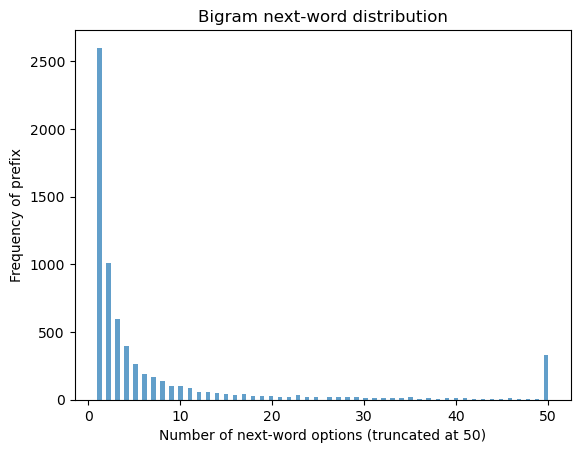

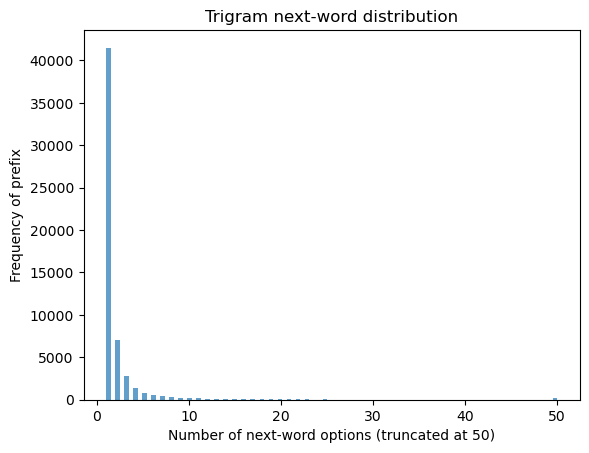

In [21]:
# --- Plot comparison of next-word options ---
def plot_ngram_distribution(ngrams, title, max_count=50):
    counts = [len(v) for v in ngrams.values()]
    counts = np.clip(counts, None, max_count)  # truncate counts at max_count
    plt.hist(counts, bins=100, alpha=0.7)
    plt.xlabel('Number of next-word options (truncated at {})'.format(max_count))
    plt.ylabel('Frequency of prefix')
    plt.title(title)
    plt.show()


plot_ngram_distribution(bi, 'Bigram next-word distribution')
plot_ngram_distribution(tri, 'Trigram next-word distribution')

# RNN - LSTM - GRU 

In [31]:
url = "https://www.gutenberg.org/files/1342/1342-0.txt" # Example: Pride and Prejudice
text = requests.get(url).text
# --- Preprocess text ---
words = re.findall(r"[a-zA-Z]+", text.lower())

In [32]:
# --- Preprocess text ---
text_string = ' '.join(words)

In [33]:
# --- Tokenize ---
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_string])
word_index = tokenizer.word_index

In [34]:
# --- Create sequences ---
sequence_length = 5
words_list = text_string.split()
sequences = []
for i in range(sequence_length, len(words_list)):
    seq = words_list[i-sequence_length:i+1]
    sequences.append(seq)

In [35]:
# Convert words to integers
sequences_int = [[word_index[w] for w in seq] for seq in sequences]
sequences_int = np.array(sequences_int)

X = sequences_int[:, :-1]
y = sequences_int[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=len(word_index) + 1)

In [36]:
# --- Build SimpleRNN model ---
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=sequence_length))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dense(len(word_index) + 1, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2025-10-08 07:57:26.923283: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-10-08 07:57:26.923316: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: thinkpad
2025-10-08 07:57:26.923324: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: thinkpad
2025-10-08 07:57:26.923387: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 535.247.1
2025-10-08 07:57:26.923410: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 535.247.1
2025-10-08 07:57:26.923416: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 535.247.1


In [37]:
# --- Build LSTM model ---
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=sequence_length))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(len(word_index) + 1, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# --- Build GRU model ---
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=sequence_length))
gru_model.add(GRU(100))
gru_model.add(Dense(len(word_index) + 1, activation='softmax'))
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
print("Models built. Starting training...")
# --- Train RNN ---
rnn_model.fit(X, y, epochs=3, batch_size=256)

# --- Train GRU ---
gru_model.fit(X, y, epochs=3, batch_size=256)  # Use more epochs for better results

# --- Train LSTM ---
lstm_model.fit(X, y, epochs=3, batch_size=256)


Models built. Starting training...
Epoch 1/3
Epoch 1/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.0412 - loss: 6.4919
Epoch 2/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.0412 - loss: 6.4919
Epoch 2/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0816 - loss: 5.8650
Epoch 3/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0816 - loss: 5.8650
Epoch 3/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.1100 - loss: 5.4908
503/503 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.1100 - loss: 5.4908
Epoch 1/3
Epoch 1/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.0342 - loss: 6.5981
Epoch 2/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.0342 - loss: 6.5981
Epoch 2/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.0460 - loss: 6.2486
Epoch 3/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.0460 - loss: 6.2486
Epoch 3/3
503/503 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.0685 - loss: 5.979

In [12]:
# --- Text generation function ---
def generate_text(model, tokenizer, seed_text, num_words=20):
    result = seed_text.split()
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([' '.join(result[-sequence_length:])])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = tokenizer.index_word.get(predicted[0], '')
        result.append(output_word)
    return ' '.join(result)

In [ ]:
# --- Generate text examples ---
seed = "the king said"
print("RNN generated text:\n", generate_text(rnn_model, tokenizer, seed, 20))
print("\nGRU generated text:\n", generate_text(gru_model, tokenizer, seed, 20))
print("\nLSTM generated text:\n", generate_text(lstm_model, tokenizer, seed, 20))

GRU generated text:
 the king said she was not to be so much in the room and the next of the room and the next of

LSTM generated text:
 the king said he was a man of the family and the whole of the man of the family and the whole of


# More on Chatbots
- ELIZA (1966): Pattern-matching, therapist parody.
    - ELIZA was created by Joseph Weizenbaum at MIT. The most famous script, DOCTOR, mimicked a Rogerian psychotherapist by using simple pattern-matching and keyword-based responses, often just rephrasing the user's input as a question. It was a parody, and Weizenbaum was surprised by how seriously users took it, leading to the concept of the "ELIZA effect."

- PARRY (1972): Simulated paranoia, added some “beliefs.”
    - Created by psychiatrist Kenneth Colby at Stanford, PARRY simulated a paranoid schizophrenic. It was more advanced than ELIZA because it had a more complex model of human behavior, including "beliefs" and "emotions" that could be triggered by certain conversation topics. It was tested in a variation of the Turing Test and often fooled psychiatrists.

- SHRDLU (1970s): Natural language in a limited blocks world → symbol grounding.
    - Terry Winograd developed SHRDLU at MIT around 1970. It operated in a "blocks world" where it could understand and execute commands related to a virtual table with various blocks, cones, and pyramids. This project was a major step in natural language understanding and highlighted the concept of "symbol grounding," where words are connected to physical objects or concepts.

- Dr. Sbaitso (1990s): SoundBlaster-era pseudo-psych chatbot.
    - Dr. Sbaitso was a text-to-speech program distributed with Creative Labs' Sound Blaster sound cards in the early 1990s. It mimicked a psychologist, much like ELIZA's DOCTOR script, but its main purpose was to showcase the card's voice synthesis capabilities.

- A.L.I.C.E. (1995): AIML-based, inspired later systems like Cleverbot.
    - A.L.I.C.E. (Artificial Linguistic Internet Computer Entity) was created by Richard Wallace and "came to life" in 1995. It is based on AIML (Artificial Intelligence Markup Language), a rule-based XML format for creating chatbots. It has won the Loebner Prize multiple times. While it inspired many AIML-based systems, Cleverbot's learning from user conversations is a fundamentally different approach. Cleverbot was developed independently by Rollo Carpenter, starting as Jabberwacky in 1997.

- Cleverbot/Jabberwacky (1997–): Learned from conversations with users.
    - Rollo Carpenter's Jabberwacky, which evolved into Cleverbot, was designed to learn from its conversations with humans. It doesn't rely on pre-scripted rules like AIML but instead stores and retrieves responses from its vast database of past interactions.

- Racter (1980s): Generated surreal prose (“The Policeman’s Beard is Half Constructed”).
    - Racter was a computer program by William Chamberlain and Thomas Etter. The book The Policeman's Beard Is Half Constructed (1984) was marketed as being entirely written by the AI. The book's surreal and nonsensical style is characteristic of the program's method of combining pre-programmed text and grammar rules.

- Talespin (1970s): Generated simple narratives via planning.
    - TALE-SPIN, developed by James Meehan, was a program from the late 1970s that generated short stories. It used a planning-based approach where it would construct a narrative by selecting and arranging events from a knowledge base to achieve a character's goal.

- Cyc (ongoing): Knowledge base project — “common sense AI.”
    - Cyc is a long-term project started by Douglas Lenat in 1984. Its goal is to create a massive knowledge base of "common sense" information, manually entered in a formal language, to allow for human-like reasoning and to serve as a foundation for other AI systems. It is an ongoing project.

- Eugene Goostman (2010s): Chatbot that posed as a 13-year-old boy (claimed Turing Test pass).

    - In 2014, Eugene Goostman, a chatbot developed by a team of programmers, convinced 33% of the judges in a Turing Test competition that it was human. However, this "pass" was highly controversial. Critics pointed out that the bot's persona—a non-native English speaker who was 13 years old—provided an excuse for its grammatical errors and lack of general knowledge, allowing it to avoid difficult questions.

- BlenderBot (Meta, 2020s): Open-domain neural conversational model.
    - BlenderBot is a family of open-source chatbots developed by Meta AI (formerly Facebook AI) starting in 2020. They are neural conversational models, meaning they are built on large-scale deep learning architectures, unlike the rule-based systems of the past. They are designed for "open-domain" conversation, meaning they can discuss a wide range of topics.

- Kuki (Mitsuku, 2005–): AIML-based, multiple Loebner Prize wins.
    - Kuki, formerly known as Mitsuku, is a chatbot created by Steve Worswick. It is indeed based on AIML and has won the annual Loebner Prize—a competition styled after the Turing Test—a record five times. This makes it one of the most successful and well-known chatbots in the world.